In [1]:
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import glob
import csv
import pandas as pd
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")

In [2]:
df_all = pd.read_csv('./data/different_slate_size.csv')

df_all['Precision (%)'] = df_all['Precision (%)'] * 100
df_all['Recall (%)'] = df_all['Recall (%)'] * 100

df_all

,Slate Size,Algorithm,Seed,Precision (%),Recall (%),Diversity,CC
0,3,Random,0,0.745374,0.031163,0.858850,0.278836
1,4,Random,0,0.750586,0.038244,0.926413,0.338258
2,5,Random,0,0.725567,0.045497,0.959944,0.387416
3,6,Random,0,0.761011,0.055800,0.978516,0.430196
4,7,Random,0,0.755054,0.065055,0.989660,0.468507
...,...,...,...,...,...,...,...
115,6,List-CVAE,954358,26.392580,4.569956,0.076900,0.456670
116,7,List-CVAE,954358,25.259608,4.917397,0.124285,0.478357
117,8,List-CVAE,954358,25.377130,5.676790,0.129104,0.503756
118,9,List-CVAE,954358,24.556650,5.918217,0.113844,0.539891


<ipython-input-15-b21aece081eb>:9: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  bb = lgd.get_bbox_to_anchor().inverse_transformed(ax.transAxes)


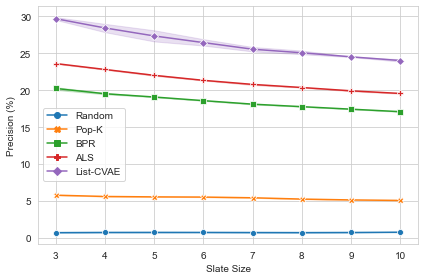

In [15]:
ax = sns.lineplot(x="Slate Size", y="Precision (%)", hue="Algorithm",
                  style="Algorithm", markers=True, dashes=False,
                  data=df_all)

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles=handles[1:], labels=labels[1:], loc='center left')

# Get the bounding box of the original legend
bb = lgd.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

# Change to location of the legend. 
xOffset = 0.08
bb.y0 -= xOffset
bb.y1 -= xOffset
lgd.set_bbox_to_anchor(bb, transform = ax.transAxes)


fig = ax.get_figure()
fig.tight_layout()
fig.savefig("precision.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

# Put the legend out of the figure
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

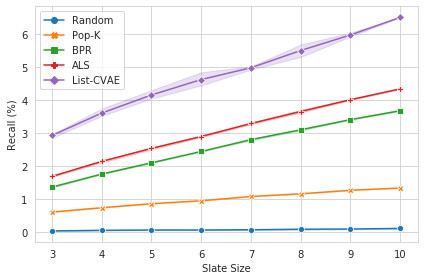

In [6]:
ax = sns.lineplot(x="Slate Size", y="Recall (%)", hue="Algorithm",
                  style="Algorithm", markers=True, dashes=False,
                  data=df_all)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])


fig = ax.get_figure()
fig.tight_layout()
fig.savefig("recall.pdf")

In [5]:
df_large_slate = pd.read_csv('./data/large_slate_size.csv')
df_large_slate['Precision (%)'] = df_large_slate['Precision (%)'] * 100
df_large_slate['Recall (%)'] = df_large_slate['Recall (%)'] * 100

for name, group in df_large_slate.groupby(['Slate Size', 'Algorithm']):
    print(name)
    print(f"precision, mean: {group['Precision (%)'].mean()}, error: {group['Precision (%)'].std() / np.sqrt(len(group))}")
    print(f"recall, mean: {group['Recall (%)'].mean()}, error: {group['Recall (%)'].std() / np.sqrt(len(group))}")
    

(25, 'ALS')
precision, mean: 16.443124381220358, error: 0.007928602616484459
recall, mean: 8.49894373808364, error: 0.007358754245334211
(25, 'BPR')
precision, mean: 14.196863112917569, error: 0.01910415698693241
recall, mean: 7.183727329301841, error: 0.01707483745184273
(25, 'List-CVAE')
precision, mean: 18.93095721952987, error: 0.10238038256167047
recall, mean: 11.283658302596967, error: 0.047158313850989945
(25, 'Pop-K')
precision, mean: 5.00891321344806, error: nan
recall, mean: 2.953828032003324, error: nan
(25, 'Random')
precision, mean: 0.749960906958551, error: 0.013449218387590008
recall, mean: 0.2382642255415491, error: 0.00852166328910112
(50, 'ALS')
precision, mean: 14.008962534521102, error: 0.004603212511148942
recall, mean: 13.773555677707835, error: 0.010873433052465582
(50, 'BPR')
precision, mean: 11.966234172268022, error: 0.011317344590739208
recall, mean: 11.631622988793454, error: 0.011679809317641005
(50, 'List-CVAE')
precision, mean: 15.508519618570924, error: 

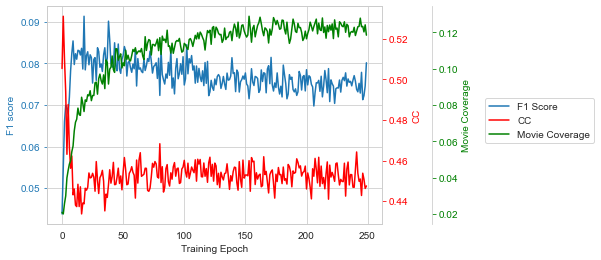

In [36]:
df_large_summary = pd.read_csv('../runs/listcvae_long_job/exp_listcvae_long_job/_num_250_/result_outputs/summary.csv')
df_large_summary.columns = ['loss', 'precision', 'hr', 'F1 Score', 'Movie Coverage', 'CC', 'Training Epoch']

ax = df_large_summary.plot(x="Training Epoch", y="F1 Score", legend=False)
ax2 = ax.twinx()
ax3 = ax.twinx()

rspine = ax3.spines['right']
rspine.set_position(('axes', 1.15))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)

df_large_summary.plot(x="Training Epoch", y="CC", ax=ax2, legend=False, color="r")
ax2.grid(None)

df_large_summary.plot(x="Training Epoch", y="Movie Coverage", ax=ax3, legend=False, color="g")
ax3.grid(None)

ax.set_ylabel("F1 score", color=ax.get_lines()[-1].get_color())
ax2.set_ylabel("CC", color=ax2.get_lines()[-1].get_color())
ax3.set_ylabel("Movie Coverage", color=ax3.get_lines()[-1].get_color())

ax.tick_params(axis='y', colors=ax.get_lines()[-1].get_color())
ax2.tick_params(axis='y', colors=ax2.get_lines()[-1].get_color())
ax3.tick_params(axis='y', colors=ax3.get_lines()[-1].get_color())

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
lgd = ax2.legend(lines + lines2 + lines3, labels + labels2 + labels3, bbox_to_anchor=(1.65, 0.6))

fig = ax.get_figure()
# fig.tight_layout()
fig.savefig("training_large_epoch.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

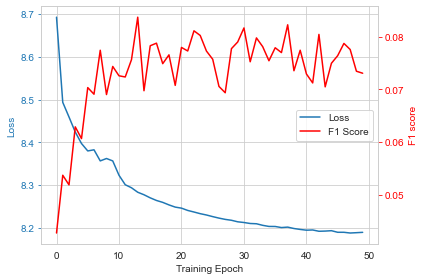

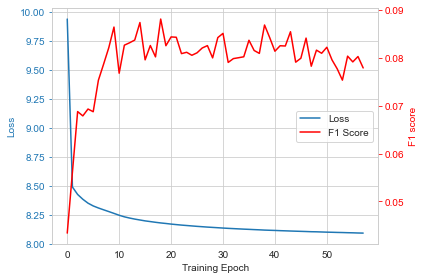

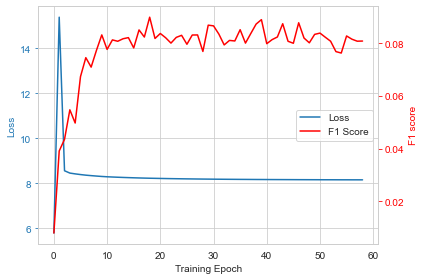

In [59]:
df_no_bn = pd.read_csv('../runs/listcvae_no_bn/tra_64_emb_32_lat_16_lr_0.001_enc_[256,256]_dec_[256,256]_pri_[32,32]_/result_outputs/summary.csv')
df_bn = pd.read_csv('../runs/listcvae_dropout_annealing/tra_64_emb_32_lat_16_lr_0.001_enc_[1024,1024]_dec_[1024,1024]_pri_[32,32]_enc_leaky_dec_leaky_pri_leaky_enc_0.1_dec_0.1_pri_0_typ_constant_max_1.5_cyc_1_/result_outputs/summary.csv')
df_annealing = pd.read_csv('../runs/listcvae_dropout_annealing/tra_64_emb_32_lat_16_lr_0.001_enc_[1024,1024]_dec_[1024,1024]_pri_[32,32]_enc_default_dec_default_pri_default_enc_0.1_dec_0.1_pri_0_typ_linear_max_2.0_cyc_1_/result_outputs/summary.csv')

for idx, df in enumerate([df_no_bn, df_bn, df_annealing]):
    df.columns = ['Loss', 'precision', 'hr', 'F1 Score', 'Diversity', 'Training Epoch']
    
    ax = df.plot(x="Training Epoch", y="Loss", legend=False)
    ax2 = ax.twinx()
    df.plot(x="Training Epoch", y="F1 Score", ax=ax2, legend=False, color="r")
    ax2.grid(None)
    
    ax.set_ylabel("Loss", color=ax.get_lines()[-1].get_color())
    ax2.set_ylabel("F1 score", color=ax2.get_lines()[-1].get_color())
    
    ax.tick_params(axis='y', colors=ax.get_lines()[-1].get_color())
    ax2.tick_params(axis='y', colors=ax2.get_lines()[-1].get_color())
    
    # ask matplotlib for the plotted objects and their labels
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='center right')
    
    fig = ax.get_figure()
    fig.tight_layout()
    fig.savefig(f"training_plots_{idx}.pdf")



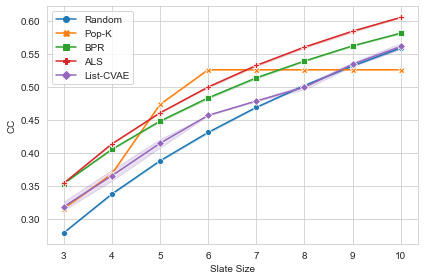

In [17]:
df_all = pd.read_csv('./data/different_slate_size.csv')

df_all['Precision (%)'] = df_all['Precision (%)'] * 100
df_all['Recall (%)'] = df_all['Recall (%)'] * 100

ax = sns.lineplot(x="Slate Size", y="CC", hue="Algorithm",
                  style="Algorithm", markers=True, dashes=False,
                  data=df_all)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])


fig = ax.get_figure()
fig.tight_layout()
fig.savefig("cc.pdf")

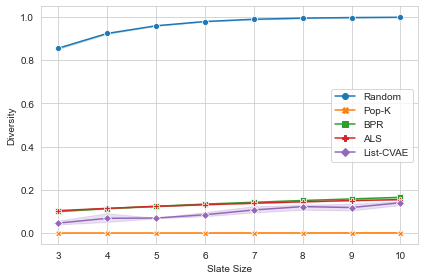

In [18]:
df_all = pd.read_csv('./data/different_slate_size.csv')

df_all['Precision (%)'] = df_all['Precision (%)'] * 100
df_all['Recall (%)'] = df_all['Recall (%)'] * 100

ax = sns.lineplot(x="Slate Size", y="Diversity", hue="Algorithm",
                  style="Algorithm", markers=True, dashes=False,
                  data=df_all)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])


fig = ax.get_figure()
fig.tight_layout()
fig.savefig("cc.pdf")

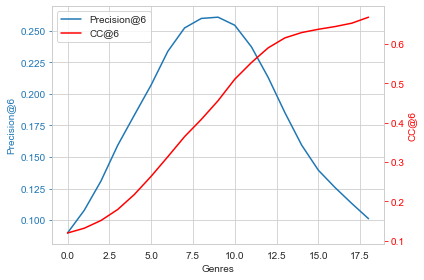

In [24]:
df_genres = pd.read_csv('./data/different_genres.csv')

df_genres.columns = ['Precision@5', 'HR', 'F1 Score', 'Diversity', 'CC@5', 'Genres']

ax = df_genres.plot(x="Genres", y="Precision@5", legend=False)
ax2 = ax.twinx()
df_genres.plot(x="Genres", y="CC@5", ax=ax2, legend=False, color="r")
ax2.grid(None)

ax.set_ylabel("Precision@5", color=ax.get_lines()[-1].get_color())
ax2.set_ylabel("CC@5", color=ax2.get_lines()[-1].get_color())

ax.tick_params(axis='y', colors=ax.get_lines()[-1].get_color())
ax2.tick_params(axis='y', colors=ax2.get_lines()[-1].get_color())

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

fig = ax.get_figure()
fig.tight_layout()
fig.savefig(f"genres_increasing.pdf")

In [15]:
df_genres_all = pd.read_csv('./data/different_genres_2.csv')

for slate_size, als_value, als_cc in zip([4, 6, 10], [0.228, 0.213, 0.195], [0.41, 0.5, 0.605]):
    precision_name = f'P@{slate_size}'
    cc_name = f'CC@{slate_size}'

    df_genres_all.columns = ['slate_size','seed', precision_name, 'HR', 'F1 Score', 'Diversity', cc_name, 'Genres']
    df_genres = df_genres_all[df_genres_all['slate_size'] == slate_size]
    
    ax = sns.lineplot(x="Genres", y=precision_name, markers=True, dashes=False,
                      data=df_genres, label=precision_name, legend=False)
    ax2 = ax.twinx()
    ax2 = sns.lineplot(x="Genres", y=cc_name, markers=True, dashes=False,
                      data=df_genres, ax=ax2, color="r", label=cc_name, legend=False)
    
    # df_genres.plot(x="Genres", y="CC@6", ax=ax2, legend=False, )
    ax2.grid(None)
    
    ax.set_ylabel(precision_name, color=ax.get_lines()[-1].get_color())
    ax2.set_ylabel(cc_name, color=ax2.get_lines()[-1].get_color())
    
    ax.tick_params(axis='y', colors=ax.get_lines()[-1].get_color())
    ax2.tick_params(axis='y', colors=ax2.get_lines()[-1].get_color())
    
    ax.axhline(als_value, ls='--', label=f'ALS P@{slate_size}')
    ax2.axhline(als_cc, ls='--', color="r", label=f'ALS CC@{slate_size}')
    
    # ask matplotlib for the plotted objects and their labels
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend([lines[0]] + [lines2[0]], [labels[0]] + [labels2[0]], loc='upper left')
       
    ax2.legend([lines[1]] + [lines2[1]], [labels[1]] + [labels2[1]], loc='lower center')

    fig = ax.get_figure()
    fig.tight_layout()
    fig.savefig(f"genres_increasing_{slate_size}_BPR.pdf")
    plt.clf()
    

<Figure size 432x288 with 0 Axes>

In [23]:
df_genres_all = pd.read_csv('./data/different_genres_2.csv')

for slate_size, bpr_score, als_score in zip([4, 6, 10], [0, 0.13392229695813673, 0.1639393635177191], [0, 0.13101094267643812, 0.15480373456480273]):
    diversity = f'Movie Coverage@{slate_size}'

    df_genres_all.columns = ['slate_size','seed', 'Precision', 'HR', 'F1 Score', diversity, 'CC', 'Genres']
    df_genres = df_genres_all[df_genres_all['slate_size'] == slate_size]
    
    ax = sns.lineplot(x="Genres", y=diversity, markers=True, dashes=False,
                      data=df_genres, label="List-CVAE", legend=False)
    
    ax.axhline(als_score, ls='--', color='r', label=f'ALS')
    ax.axhline(bpr_score, ls='--', color='g', label=f'BPR')
    
        # ask matplotlib for the plotted objects and their labels
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2, loc='lower left')
    
    fig = ax.get_figure()
    fig.tight_layout()
    fig.savefig(f"diversity_increasing_{slate_size}.pdf")
    plt.clf()

<Figure size 432x288 with 0 Axes>

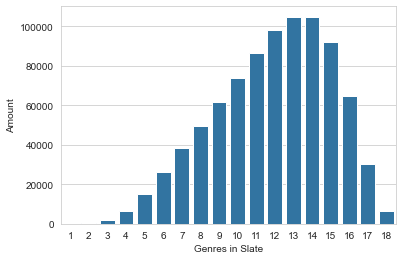

In [6]:
df_genres = pd.read_csv('./data/different_data_genre_2.csv')

df_genres.columns = ['algorithm', 'Genres in Slate', 'Amount']

fig = sns.barplot(x="Genres in Slate", y="Amount", color='#1f77b4', data=df_genres[df_genres['algorithm'] == 'random'])
fig.get_figure().savefig("random.pdf")
plt.clf()

fig =sns.barplot(x="Genres in Slate", y="Amount", color='#1f77b4', data=df_genres[df_genres['algorithm'] == 'future'])
fig.get_figure().savefig("future.pdf")
plt.clf()

fig = sns.barplot(x="Genres in Slate", y="Amount", color='#1f77b4', data=df_genres[df_genres['algorithm'] == 'diverse'])
fig.get_figure().savefig("diverse.pdf")


In [2]:
import matplotlib.ticker as plticker

# List-CVAE 0
# {-1: 201, 1902: 0, 1903: 0, 1915: 0, 1916: 0, 1917: 0, 1918: 0, 1919: 0, 1920: 0, 1921: 0, 1922: 1, 1923: 0, 1924: 0, 1925: 0, 1926: 0, 1927: 0, 1928: 0, 1929: 0, 1930: 0, 1931: 12, 1932: 0, 1933: 0, 1934: 0, 1935: 0, 1936: 0, 1937: 0, 1938: 0, 1939: 15, 1940: 3, 1941: 13, 1942: 5, 1943: 0, 1944: 4, 1945: 0, 1946: 1, 1947: 0, 1948: 1, 1949: 1, 1950: 16, 1951: 7, 1952: 2, 1953: 4, 1954: 11, 1955: 0, 1956: 0, 1957: 15, 1958: 8, 1959: 13, 1960: 11, 1961: 5, 1962: 8, 1963: 9, 1964: 83, 1965: 52, 1966: 29, 1967: 17, 1968: 63, 1969: 1, 1970: 0, 1971: 40, 1972: 37, 1973: 13, 1974: 17, 1975: 26, 1976: 88, 1977: 38, 1978: 0, 1979: 83, 1980: 78, 1981: 6, 1982: 99, 1983: 77, 1984: 58, 1985: 42, 1986: 25, 1987: 57, 1988: 51, 1989: 90, 1990: 72, 1991: 76, 1992: 122, 1993: 199, 1994: 629, 1995: 577, 1996: 348, 1997: 545, 1998: 551, 1999: 750, 2000: 524, 2001: 579, 2002: 466, 2003: 460, 2004: 523, 2005: 236, 2006: 593, 2007: 426, 2008: 601, 2009: 996, 2010: 658, 2011: 390, 2012: 710, 2013: 489, 2014: 1156, 2015: 4846, 2016: 12905, 2017: 22, 2018: 0, 2019: 0}

df_years = pd.read_csv('./data/predicted_movie_years.csv')

df_years.columns = ['algorithm', 'seed', 'Movie Release Year', 'Amount']

df_years['Movie Release Year'] = df_years['Movie Release Year'].astype('int32')

fig = sns.barplot(x="Movie Release Year", y="Amount", color='#1f77b4', data=df_years[df_years['algorithm'] == 'ALS'],ci=None)
ax = plt.gca()
loc = plticker.MultipleLocator(base=10) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
fig.get_figure().savefig("year_als.pdf")
plt.clf()
plt.show()

fig = sns.barplot(x="Movie Release Year", y="Amount", color='#1f77b4', data=df_years[df_years['algorithm'] == 'BPR'],ci=None)
ax = plt.gca()
loc = plticker.MultipleLocator(base=10) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
fig.get_figure().savefig("year_bpr.pdf")
plt.clf()
plt.show()

fig = sns.barplot(x="Movie Release Year", y="Amount", color='#1f77b4', data=df_years[df_years['algorithm'] == 'random'], ci=None)
ax = plt.gca()
loc = plticker.MultipleLocator(base=10) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
fig.get_figure().savefig("year_random.pdf")
plt.clf()
plt.show()

fig = sns.barplot(x="Movie Release Year", y="Amount", color='#1f77b4', data=df_years[df_years['algorithm'] == 'PopK'], ci=None)
ax = plt.gca()
loc = plticker.MultipleLocator(base=10) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
fig.get_figure().savefig("year_popK.pdf")
plt.clf()
plt.show()


fig = sns.barplot(x="Movie Release Year", y="Amount", color='#1f77b4', data=df_years[df_years['algorithm'] == 'listcvae'], ci=None)
ax = plt.gca()
loc = plticker.MultipleLocator(base=10) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
fig.get_figure().savefig("year_listcvae.pdf")
plt.clf()
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [98]:
df_genres = pd.read_csv('./data/different_dataset.csv')

df_genres.columns = ['dataset', 'seed', 'P@5', 'HR', 'F1 Score', 'Diversity', 'CC@5', 'Genres']

ax = sns.lineplot(x="Genres", y="P@5", markers=True, dashes=False,
                  data=df_genres[df_genres['dataset'] == 'random'], label='P@5', legend=False)
ax2 = ax.twinx()
ax2 = sns.lineplot(x="Genres", y="CC@5", markers=True, dashes=False,
                  data=df_genres[df_genres['dataset'] == 'random'], ax=ax2, color="r", label='CC@5', legend=False)

# df_genres.plot(x="Genres", y="CC@6", ax=ax2, legend=False, )
ax2.grid(None)

ax.set_ylabel("P@5", color=ax.get_lines()[-1].get_color())
ax2.set_ylabel("CC@5", color=ax2.get_lines()[-1].get_color())

ax.tick_params(axis='y', colors=ax.get_lines()[-1].get_color())
ax2.tick_params(axis='y', colors=ax2.get_lines()[-1].get_color())

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper left')

fig = ax.get_figure()
fig.tight_layout()
fig.savefig(f"dataset_random.pdf")
plt.clf()

ax = sns.lineplot(x="Genres", y="P@5", markers=True, dashes=False,
                  data=df_genres[df_genres['dataset'] == 'future'], label='P@5', legend=False)
ax2 = ax.twinx()
ax2 = sns.lineplot(x="Genres", y="CC@5", markers=True, dashes=False,
                  data=df_genres[df_genres['dataset'] == 'future'], ax=ax2, color="r", label='CC@5', legend=False)

# df_genres.plot(x="Genres", y="CC@6", ax=ax2, legend=False, )
ax2.grid(None)

ax.set_ylabel("P@5", color=ax.get_lines()[-1].get_color())
ax2.set_ylabel("CC@5", color=ax2.get_lines()[-1].get_color())

ax.tick_params(axis='y', colors=ax.get_lines()[-1].get_color())
ax2.tick_params(axis='y', colors=ax2.get_lines()[-1].get_color())

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper left')

fig = ax.get_figure()
fig.tight_layout()
fig.savefig(f"dataset_future.pdf")
plt.clf()


ax = sns.lineplot(x="Genres", y="P@5", markers=True, dashes=False,
                  data=df_genres[df_genres['dataset'] == 'diverse'], label='P@5', legend=False)
ax2 = ax.twinx()
ax2 = sns.lineplot(x="Genres", y="CC@5", markers=True, dashes=False,
                  data=df_genres[df_genres['dataset'] == 'diverse'], ax=ax2, color="r", label='CC@5', legend=False)

# df_genres.plot(x="Genres", y="CC@6", ax=ax2, legend=False, )
ax2.grid(None)

ax.set_ylabel("P@5", color=ax.get_lines()[-1].get_color())
ax2.set_ylabel("CC@5", color=ax2.get_lines()[-1].get_color())

ax.tick_params(axis='y', colors=ax.get_lines()[-1].get_color())
ax2.tick_params(axis='y', colors=ax2.get_lines()[-1].get_color())

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper left')

fig = ax.get_figure()
fig.tight_layout()
fig.savefig(f"dataset_diverse.pdf")
plt.clf()

<Figure size 432x288 with 0 Axes>